In [1]:
import pandas as pd
import re
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
emotion_classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base",
    tokenizer="j-hartmann/emotion-english-distilroberta-base",
    truncation=True,  # Automatically truncate long text
    padding=True,     # Automatically pad shorter text
    max_length=512    # Set maximum length to 512 tokens
)

## for iphone

In [3]:
iphone = pd.read_json('reddit_iphone.json')

In [4]:
iphone = iphone.drop_duplicates()
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1562 non-null   object
 1   Upvotes  1562 non-null   int64 
 2   URL      1562 non-null   object
 3   Created  1562 non-null   int64 
 4   Text     1562 non-null   object
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
def clean_text(text):
    
    # Convert to lowercase
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = ' '.join(text.split())

    return text

In [6]:
def detect_emotion(text):
    result = emotion_classifier(text)
    # Extract the label (emotion)
    return result[0]['label']

In [7]:
import re

In [8]:
iphone['Text'] = iphone['Text'].apply(clean_text)
iphone['emotion'] = iphone['Text'].apply(detect_emotion)

In [9]:
iphone['emotion']

0       surprise
1       surprise
2            joy
3        neutral
4            joy
          ...   
9548       anger
9575     neutral
9601    surprise
9689     neutral
9703     neutral
Name: emotion, Length: 1562, dtype: object

In [10]:
iphone['emotion'].unique()

array(['surprise', 'joy', 'neutral', 'fear', 'sadness', 'anger',
       'disgust'], dtype=object)

In [11]:
emotion_counts = iphone['emotion'].value_counts()

In [13]:
import matplotlib.pyplot as plt

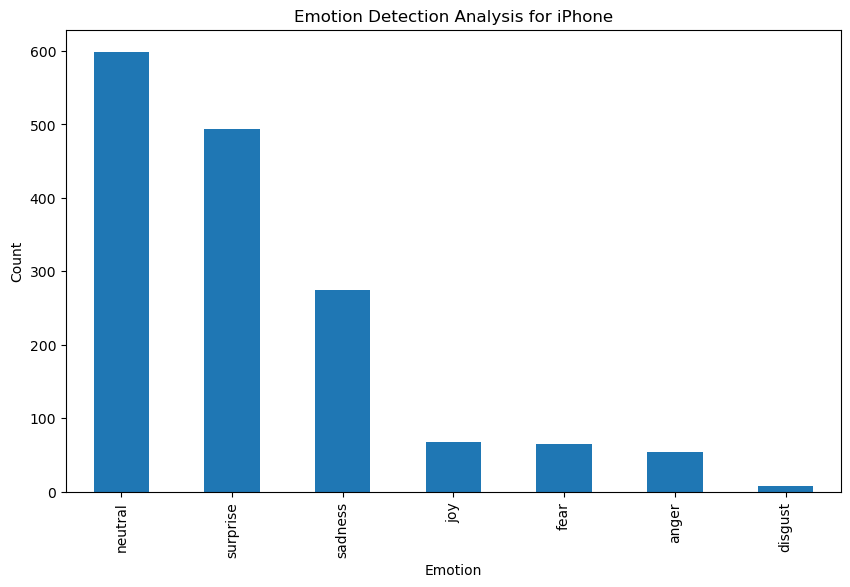

In [14]:
# Plotting the emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Detection Analysis for iPhone')
plt.show()

## for samsung

In [15]:
samsung = pd.read_json('reddit_samsung.json')
samsung = samsung.drop_duplicates()
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1862 non-null   object
 1   Upvotes  1862 non-null   int64 
 2   URL      1862 non-null   object
 3   Created  1862 non-null   int64 
 4   Text     1862 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.3+ KB


In [16]:
samsung['Text'] = samsung['Text'].apply(clean_text)
samsung['emotion'] = samsung['Text'].apply(detect_emotion)

In [17]:
emotion_counts = samsung['emotion'].value_counts()

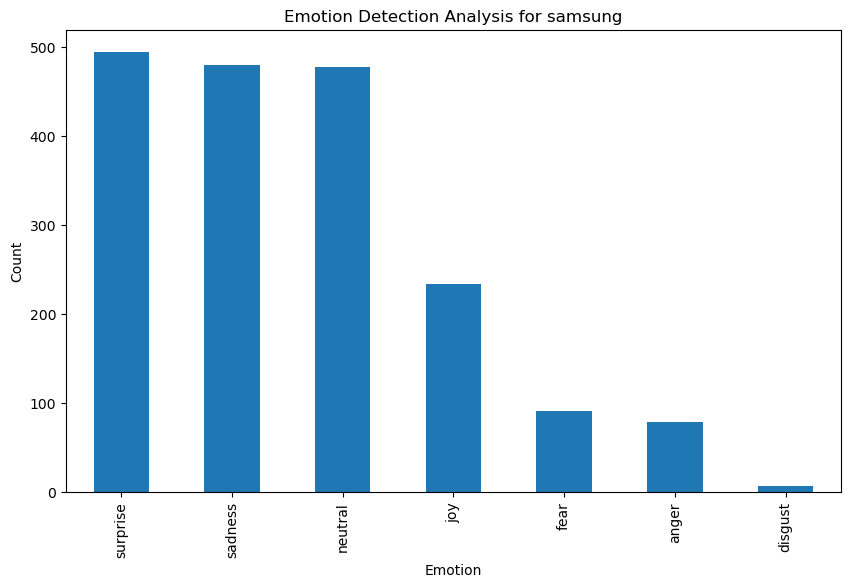

In [18]:
# Plotting the emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Detection Analysis for samsung')
plt.show()

## for xiaomi

In [19]:
xiaomi = pd.read_json('reddit_xiaomi.json')
xiaomi = xiaomi.drop_duplicates()
xiaomi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1523 non-null   object
 1   Upvotes  1523 non-null   int64 
 2   URL      1523 non-null   object
 3   Created  1523 non-null   int64 
 4   Text     1523 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.4+ KB


In [20]:
xiaomi['Text'] = xiaomi['Text'].apply(clean_text)
xiaomi['emotion'] = xiaomi['Text'].apply(detect_emotion)

In [21]:
emotion_counts = xiaomi['emotion'].value_counts()

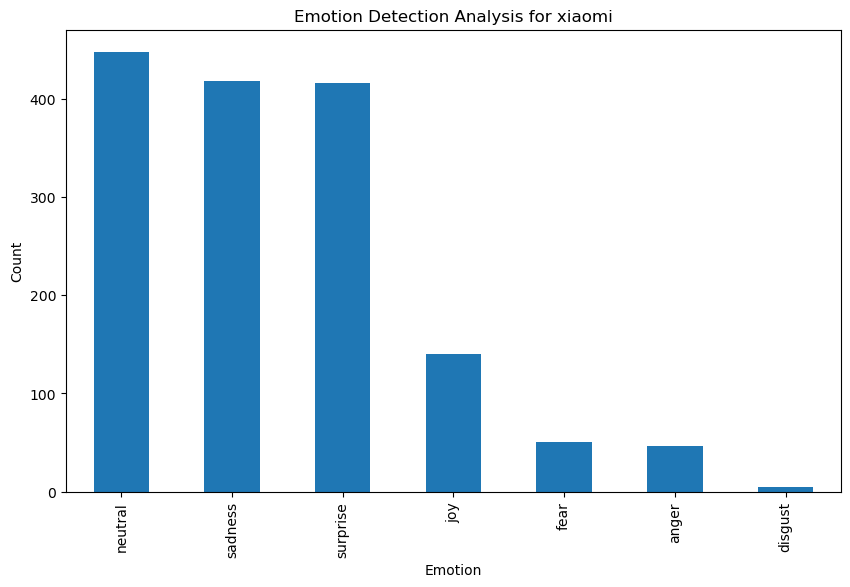

In [22]:
# Plotting the emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Detection Analysis for xiaomi')
plt.show()

## for oneplus

In [23]:
oneplus = pd.read_json('reddit_oneplus.json')
oneplus = oneplus.drop_duplicates()
oneplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1940 entries, 0 to 9850
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1940 non-null   object
 1   Upvotes  1940 non-null   int64 
 2   URL      1940 non-null   object
 3   Created  1940 non-null   int64 
 4   Text     1940 non-null   object
dtypes: int64(2), object(3)
memory usage: 90.9+ KB


In [24]:
oneplus['Text'] = oneplus['Text'].apply(clean_text)
oneplus['emotion'] = oneplus['Text'].apply(detect_emotion)

In [25]:
emotion_counts = oneplus['emotion'].value_counts()

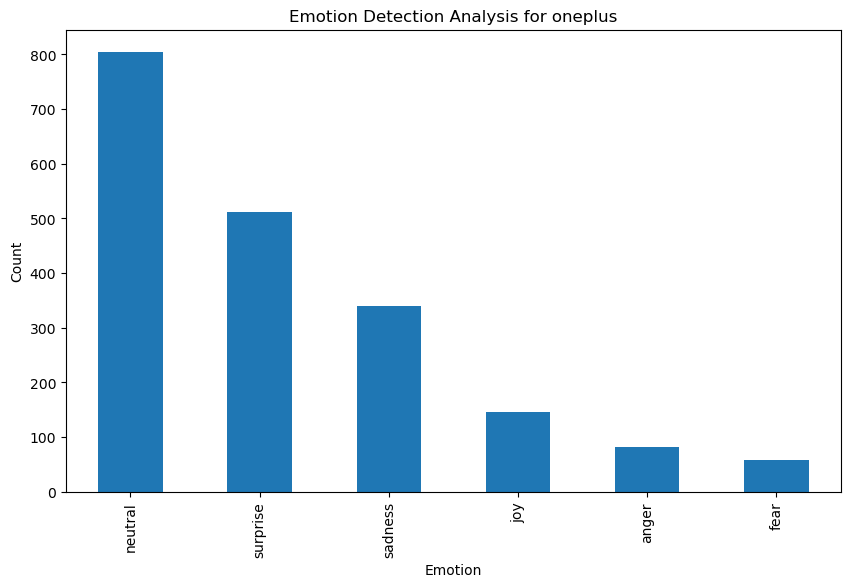

In [26]:
# Plotting the emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Detection Analysis for oneplus')
plt.show()